Теория

-1, +1 классификация
sign<w, x> скалярное произведение 
Если знак 0, то можно считать как "отказ от классиф"
Есть признак который всегда = 1, и мы выкидыавем w0
Если скалярное произведение двух элементов пространства равно нулю, то они называются ортогональными друг другу
Если <w, x> =0, значит w - вектор нормали (90')
Все что <w, x>=0 - плоскость перпендикулярная w
<w, x> < 0 слева, >0 справа от гиперплоскости
А само произведение характеризует отдаленность от плоскости

Отступ модели обозначается M
M = y<w, x>
M>0 верный ответ M<0 модель ошибается
Чем больше отступ по модулю - тем больше уверенности

Чтобы модель не классифицировала точку неправильно, если
она расположена выше плоскости, но красит в точку нижней

sign(<w, x> -t)   t - порог для выдавания цветов

***
Функция потерь

Частный выбор - бинарная функция a==y просто сравнение
Доля ошибок/верный ответов 1/l sum [a(x) == y]l средн знач
sign<w, x> == y   знак нельзя дифферинцировать
        Индикатор тоже

Вместо знака мы используем M   
//M = y<w, x>
1/l sum [M < 0]l пороговая функция ‾‾‾|___
Получается никакого градиентного спуска

L(M) = [M < 0] <= L'(M) Функция которая дугой сверху
покрывает пороговую функцию (верхняя оценка)

0<= доля ошибок <=
0<= средн[M<0] <= средн L'[M] -> min
Если мы ее минимизируем, то мы придавим ошибку к 0

Примеры дуг для порожка L'(M) 
Все они пересекаются в 0 с порогом

Logистическая:
средн(log(1 + exp(-M))) -> min график формально лучше с log2

Градиентный спуск будет:
W(new) = W(old) + n * средн( yx / 1+exp(M) )

Так же добавляем регуляризацию +a||w||^2 -> min

***
Точность (precision)
Доля верных true positive к TP + false positive

Полнота (recall)
Сколько мы смогли найти TP / TP + false negative

На небалансных выборках 100 больных и 10000+ здоровых
Модель выдает 10 верно больных, 20 ложно больных
90 пропущенных больных и 10000 верно здоровых
Accuracy 0.99 Как доля верных ответов (ошибок)
Precision 0.33 Верно True к общим True в ответе модели
Насколько можно доверять классификатору когда модель говорит что ответ положительный
Recall 0.1 Верно True к верным True на выборке (пропуски)
Показывает насколько полно мы находим положительные объекты

0 0   True positive False positive
1 99  False negative True negative


***
Нужно объединять метрики Precision n Recall
Но их две
Лучшее - F-ме ра (гармоническое среднее)
F= 2* precision * recall / precision + recall

Более общий вид 
F= (1+B^2)* precision * recall / B^2 * precision + recall
Позволяет выбирать что нам важнее

B = 0.5 - важнее точность
B = 2 - полнота

PR - кривая хорошо отображает отношение pricision и recall
при выборе t

ROC - неплохое отношение верно положительных к верно отрицательным объектам для интерпретации
Идеальный классификатор проходит через [0, 1] |‾‾
0.5 для плохой,
0 для той, что перепутала классы
Не зависит от баланса класса

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
np.random.seed(13)

n=500
X = np.random.normal(size=(n, 2))
X[:250, :] += 0.75
X[250:, :] -= 1
y = np.array([1] * 250 + [-1] * 250) #воспроизводимый рандом точек

<function matplotlib.pyplot.show(close=None, block=None)>

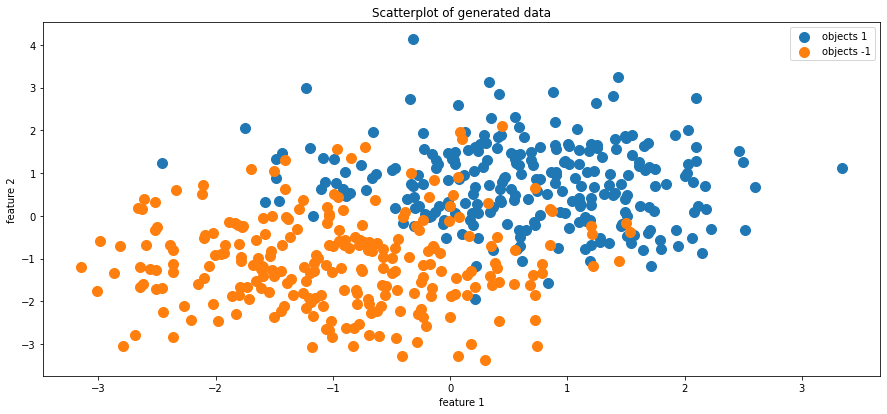

In [3]:
plt.figure(figsize=(15, 6.5)) #ширина высота
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects 1') #достает значения по х и у из сгенерированных значений
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects -1')
plt.title('Scatterplot of generated data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend() #обозначения вокруг графика
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

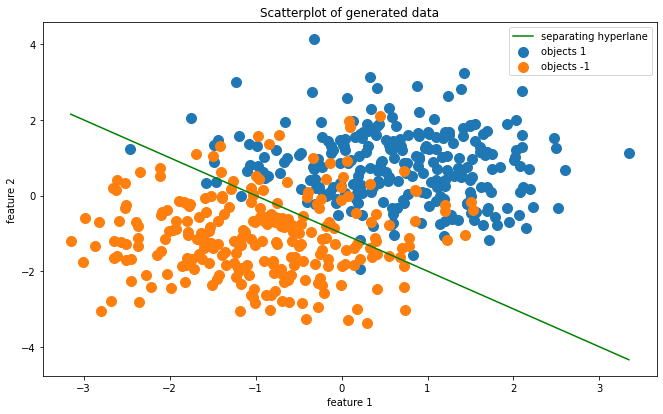

In [4]:
w0 = 1
w1 = 1
w2 = 1
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000) #нормальное распределение от минимума и максимума первого столбца (судя по всему)
x2 = (- w1 * x1 - w0) / w2 #формула прямой

plt.figure(figsize=(11, 6.5))

plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects -1')
plt.plot(x1, x2, color='green', label='separating hyperlane') #построили линию по данной формуле
plt.title('Scatterplot of generated data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show

In [5]:
def log_loss(w, X, y):  #np.dot и @ - матричное произведение
    Q = np.log(1 + np.exp(-y * (X @ w))).mean() #одна из возможных формул которые покрывают ступеньку кривой дугой
    return Q

def log_loss_grad(w, X, y):
    Q_grad = - ((X * y.reshape(-1, 1)) / (1 + np.exp(y * (X @ w))).reshape(-1, 1)).mean(axis=0) #формла градиентного спуска для нее
    return Q_grad

w_init = np.array([1.0, 1.0, 1.0])
X_new = np.c_[np.ones(n), X]
print(X_new) #Получаем исходную таблицу с тем отличием, что первый столбец =1

[[ 1.          0.03760934  1.50376638]
 [ 1.          0.70549692  1.20181234]
 [ 1.          2.09510171  1.28233789]
 ...
 [ 1.         -1.03507109 -0.67849181]
 [ 1.         -1.1739724  -2.33492537]
 [ 1.         -2.51019432 -1.69927727]]


In [6]:
log_loss(w_init, X_new, y)

0.32611741088472

In [7]:
log_loss_grad(w_init, X_new, y)

array([ 0.09558388, -0.07358689, -0.09183324])

In [8]:
def gradient_descent(X, y, w_init, n_steps, eta):
    w = w_init.copy()
    loss_array = [log_loss(w_init, X, y)] #исп формулу потерь (усл точность)
    for n in range(n_steps):
        w_grad = log_loss_grad(w, X, y) #высчитываем градиентный спуск
        w -= eta * w_grad
        loss = log_loss(w, X, y)
        loss_array.append(loss) #записываем как изменяеются потери с каждым шагом
    return w, loss_array
w, loss_array = gradient_descent(X_new, y, w_init, n_steps=1000, eta=0.1) #eta це "скорость обучения" или размер шага
print('Final weights:', w)
print('Final loss value:', loss_array[-1])
#Фанфакт: в списке значений есть значение на -2, а на -1 отображается
#как "..." и его не виддно, и можно достать только так

Final weights: [0.36488928 1.66156633 1.8519808 ]
Final loss value: 0.25390517992615297


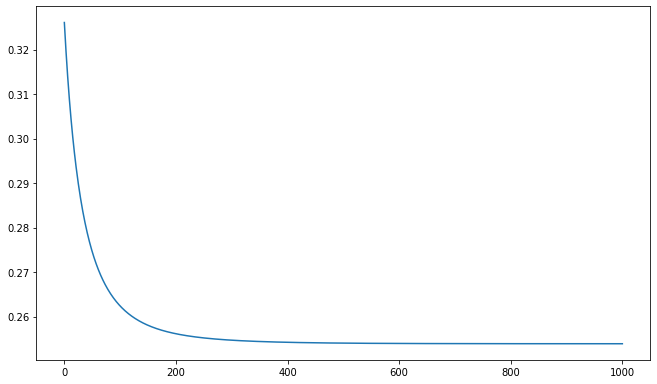

In [9]:
plt.figure(figsize=(11, 6.5))
plt.plot(loss_array)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

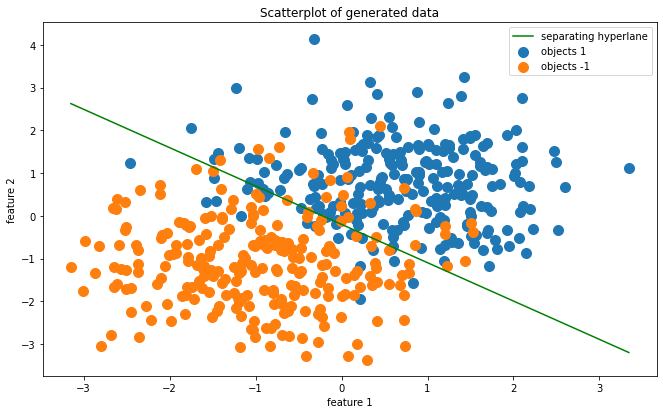

In [10]:
w0 = w[0]
w1 = w[1]
w2 = w[2]
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
x2 = (- w1 * x1 - w0) / w2

plt.figure(figsize=(11, 6.5))

plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects -1')
plt.plot(x1, x2, color='green', label='separating hyperlane')
plt.title('Scatterplot of generated data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show

In [11]:
w[0], w[1], w[2]
#при w = 0,5 1 1 тоже неплохо получатся

(0.3648892825234521, 1.6615663291020513, 1.8519807997687638)

In [12]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, learning_rate='constant', eta0=0.1, random_state=13)
#сам добавляет единичный признак в датасет
clf.fit(X, y)
y_pred_sgdclf = clf.predict(X)

In [13]:
clf.coef_, clf.intercept_

(array([[1.03540699, 1.62033805]]), array([0.5]))

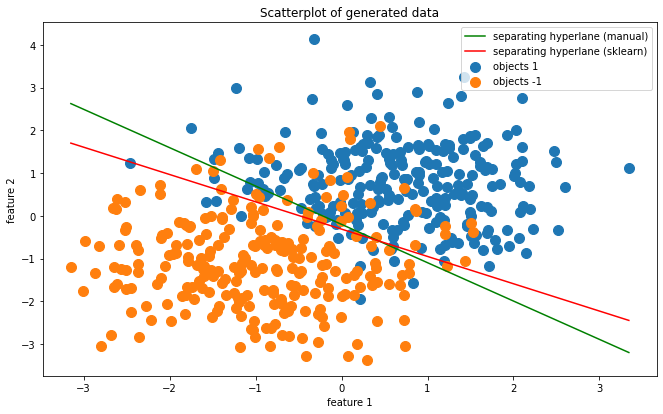

In [14]:
w0_clf = clf.intercept_.item()
w1_clf = clf.coef_[0][0]
w2_clf = clf.coef_[0][1]
x2_clf = (- w1_clf * x1 - w0_clf) / w2_clf

plt.figure(figsize=(11, 6.5))

plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects -1')
plt.plot(x1, x2, color='green', label='separating hyperlane (manual)')
plt.plot(x1, x2_clf, color='red', label='separating hyperlane (sklearn)')
plt.title('Scatterplot of generated data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

Метрики качества, кроме логистической функции

In [15]:
def predict_classes(X, w): 
    return np.sign(X @ w) #знак от премножения значений w прямой и 
                          #изначальной матрицы с единичным столбцом

y_pred = predict_classes(X_new, w)
y_pred[:6], y_pred[-6:] #первые и последние 6 предск значений

(array([ 1.,  1.,  1.,  1.,  1., -1.]), array([ 1., -1., -1., -1., -1., -1.]))

In [16]:
y[:6], y[-6:] #первые и последние 6 реальных ответов

(array([1, 1, 1, 1, 1, 1]), array([-1, -1, -1, -1, -1, -1]))

In [17]:
w

array([0.36488928, 1.66156633, 1.8519808 ])

Работает неидеально из-за выбросов (оранжевые в синих)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred) #доля верных ответов
#может давать 99%+ на статичных ответах в несбалансированных выборках

0.904

Матрица ошибок вида TP | FP 
 FN|TN

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[223,  27],
       [ 21, 229]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score
precision_score(y, y_pred) #TP / TP+FP точность среди положительного класса

0.89453125

In [21]:
223/250

0.892

In [22]:
from sklearn.metrics import recall_score
recall_score(y, y_pred) #TP / TP+FN доля для предсказанных
# положительных объектов среди всех положительных объектов в данных

0.916

In [23]:
223/244

0.9139344262295082

F-мера (F-score) как гармоническое среднее и некоторый баланс

In [24]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.9051383399209487

In [25]:
2 * precision_score(y, y_pred) * recall_score(y, y_pred) / (precision_score(y, y_pred) + recall_score(y, y_pred))

0.9051383399209487

И здесь значения совпадают, конечно же
Но почему выше не совпадают - хз)0

F-score взвешенная:         (c 1+B^2) перед уровнением и B^2 * в знаменателе
При B = 1 мы получим верхнюю формулу с 2 * pr / 1*p+r
При B = 0.5 мы получим упор на recall (полноту)

In [26]:
from sklearn.metrics import fbeta_score
beta = 0.5
fbeta_score(y, y_pred, beta=beta)

0.8987441130298274

PR-кривая AUC-PRC

Можно предсказывать вероятность принадлежности к одному из классов.
Алгоритм который будет давать 0...1 результат, где 1 = 100%
Затем, чтобы получить один из классов, 
можно задать порог t и исп a(x) = |b(x) > t|
Логистическая регрессия подходит, а порог можно задать t = 0.5

In [27]:
def predict_probabilities(X, w):
    return 1 / (1 + np.exp(-X @ w)) 
    #сигмоиндная функция от снизу слева вверх справа ~ дугой

y_pred_prob = predict_probabilities(X_new, w)
y_pred_prob[:6], y_pred_prob[-6:]

(array([0.96129551, 0.9773094 , 0.9980165 , 0.99892936, 0.97127846,
        0.34358065]),
 array([0.6877274 , 0.06982283, 0.01196644, 0.06840172, 0.0027049 ,
        0.00095486]))

Соответственно больше 0,5 - положительный класс, меньше 0,5 - отрицательный

In [28]:
y[:6], y[-6:]

(array([1, 1, 1, 1, 1, 1]), array([-1, -1, -1, -1, -1, -1]))

In [29]:
def threshold(y_pred_prob, t):
    y_pred_t = y_pred_prob.copy()
    y_pred_t[y_pred_t > t] = 1
    y_pred_t[y_pred_t < t] = -1
    return y_pred_t #выдает класс исходя из вероятности

t = 0.5
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.5
Precision: 0.89453125
Recall: 0.916


In [30]:
t = 0.75
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.75
Precision: 0.9142857142857143
Recall: 0.768


In [31]:
t = 0.25
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.25
Precision: 0.8350515463917526
Recall: 0.972


Чтобы выбрать порог и забалансить штуки можно воспользоваться кривыми

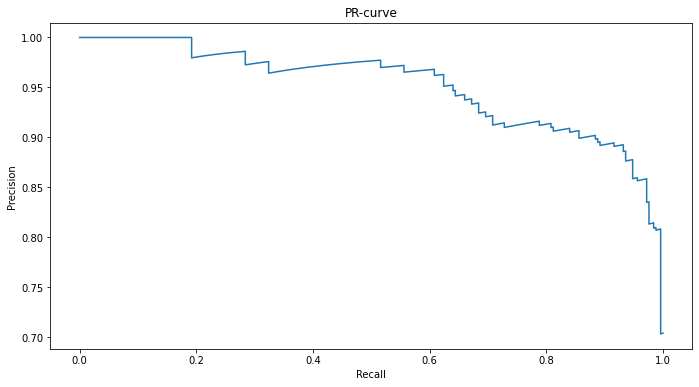

In [32]:
from sklearn.metrics import precision_recall_curve
precision_array, recall_array, thresholds = precision_recall_curve(y, y_pred_prob)
plt.figure(figsize=(11.5, 6))  #thresholds выдает значения в зависимости
plt.plot(recall_array, precision_array) #от количества значений в y, y_pred_prob
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [33]:
big_precision_idx = np.where(precision_array >= 0.95)
big_precision_idx #номера точности в precision array, начинает с 1, а не с 0

(array([187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
        265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
        278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
        291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
        304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
        317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
        330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355],
       dtype=int64),)

In [34]:
recall_array[big_precision_idx] #соотв значениям recall

array([0.64 , 0.636, 0.632, 0.628, 0.624, 0.624, 0.624, 0.62 , 0.616,
       0.612, 0.608, 0.608, 0.604, 0.6  , 0.596, 0.592, 0.588, 0.584,
       0.58 , 0.576, 0.572, 0.568, 0.564, 0.56 , 0.556, 0.556, 0.552,
       0.548, 0.544, 0.54 , 0.536, 0.532, 0.528, 0.524, 0.52 , 0.516,
       0.516, 0.512, 0.508, 0.504, 0.5  , 0.496, 0.492, 0.488, 0.484,
       0.48 , 0.476, 0.472, 0.468, 0.464, 0.46 , 0.456, 0.452, 0.448,
       0.444, 0.44 , 0.436, 0.432, 0.428, 0.424, 0.42 , 0.416, 0.412,
       0.408, 0.404, 0.4  , 0.396, 0.392, 0.388, 0.384, 0.38 , 0.376,
       0.372, 0.368, 0.364, 0.36 , 0.356, 0.352, 0.348, 0.344, 0.34 ,
       0.336, 0.332, 0.328, 0.324, 0.324, 0.32 , 0.316, 0.312, 0.308,
       0.304, 0.3  , 0.296, 0.292, 0.288, 0.284, 0.284, 0.28 , 0.276,
       0.272, 0.268, 0.264, 0.26 , 0.256, 0.252, 0.248, 0.244, 0.24 ,
       0.236, 0.232, 0.228, 0.224, 0.22 , 0.216, 0.212, 0.208, 0.204,
       0.2  , 0.196, 0.192, 0.192, 0.188, 0.184, 0.18 , 0.176, 0.172,
       0.168, 0.164,

In [35]:
thresholds[186] #этим значением должно быть t, но оно не работает

0.8871769969570549

In [36]:
t = 0.887176996957055  #тут имеет индекс на 1 меньше
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.887176996957055
Precision: 0.9523809523809523
Recall: 0.64


0.9523809523809523 ...50
0.9467455621301775 ...48

In [37]:
f1_score(y, y_pred_t)

0.7655502392344498

Площадь под PR-кривой (AUC_PRC) показывает, насколько хорошо
классификатор отранжировал объекты

In [38]:
from sklearn.metrics import auc 
auc(recall_array, precision_array)

0.9512406526621621

ROC-Кривая и AUC-POC 

Насколько хорошо алгоритм отранжировал объекты и присвоить им вероятности можно так же с помощью ROC-кривой
Так же меняя значения порога и считать значения по осям
Только теперь x - False Positive rate, y - True Positive rate
EPR = FP / FP+TN, 
TPR = TP / TP+FN #aka полнота

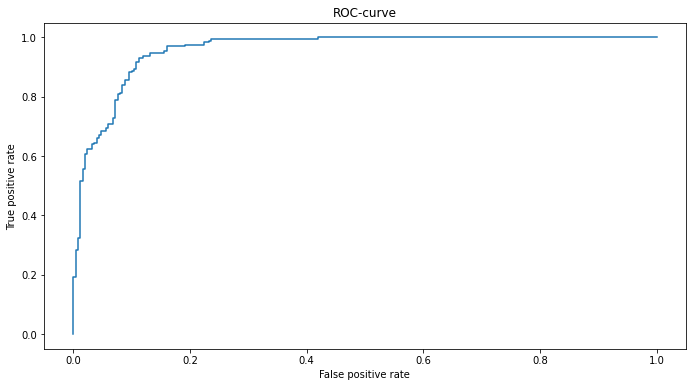

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(11.5, 6))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate') #полнота
plt.show()

Площадь под кривой показывает вероятность того, что случайно выбранна пара объектов, где один из них относится к положительному классу, а другой к отрицательному, окажется отранжированной правильно **с точки зрения верояностей**
(Алгоритм выдаст бОльшую вероятность в случае объекта положительного класса)

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred_prob)

0.959056

Как и доля правильных ответов, метрика может ввести в заблуждение при несбалансированности классов